# Soal 02 - Random Forest

1. Buatlah sebuah environment bernama .env-rf-py38 (py38 = python 3.8, disarankan 3.8.10)
2. Buatlah sebuah file requirements.txt berdasarkan hasil analisis anda pada kode dibawah ini (misal, pandas==1.5.1)
3. Carilah kode yang tidak lengkap dan lengkapi kode tersebut
4. Interpretasikan dibagian evaluasi model
5. Berikan kesimpulan dari hasil evaluasi model dibagian paling bawah dari code

# Deskripsi


- Masalah Klasifikasi penerimaan Kartu Kredit
- Terdapatat dua dataset: Creit_card_label.csv, Credit_card.csv

# Penjelasan Fitur

Ind_ID: Client ID
Gender: Gender information
Car_owner: Having car or not
Propert_owner: Having property or not
Children: Count of children
Annual_income: Annual income
Type_Income: Income type
Education: Education level
Marital_status: Marital_status
Housing_type: Living style
Birthday_count: Use backward count from current day (0), -1 means yesterday.
Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.
Mobile_phone: Any mobile phone
Work_phone: Any work phone
Phone: Any phone number
EMAIL_ID: Any email ID
Type_Occupation: Occupation
Family_Members: Family size
Another data set (Credit_card_label.csv) contains two key pieces of information
ID: The joining key between application data and credit status data, same is Ind_ID

Label: 0 is application approved and 1 is application rejected.

# Code

## Import Library && Import Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('Credit Card Approve/Credit_card.csv')
label = pd.read_csv('Credit Card Approve/Credit_card_label.csv')

## Cleaning code

In [3]:
# Menampilkan 5 data teratas
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [4]:
label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [5]:
# Merge data dan label menjadi satu dataframe
df = pd.merge(data, label, on=['Ind_ID'])
df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [9]:
df['Type_Occupation'].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [10]:
# Menghilangkan column yang tidak ingin digunakan untuk klasifikasi
kol = ['Ind_ID', 'Mobile_phone', 'Work_Phone', 'EMAIL_ID', 'Phone']
df = df.drop(columns=kol)
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1


In [11]:
# Agar memudahkan pemanggilan kolom, nama kolom dijadikan huruf kecil semua

df.columns = [x.lower() for x in df.columns]
df.head(1)

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,type_occupation,family_members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1


## EDA (Exploratory Data Analysis)

In [12]:
# Melihat data balance atau tidak
df['label'].value_counts()

label
0    1373
1     175
Name: count, dtype: int64

In [13]:
df.describe()

,children,annual_income,birthday_count,employed_days,family_members,label
count,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.000000,1548.000000
mean,0.412791,1.913993e+05,-16040.342071,59364.689922,2.161499,0.113049
std,0.776691,1.132530e+05,4229.503202,137808.062701,0.947772,0.316755
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,-19553.000000,-3174.500000,2.000000,0.000000
50%,0.000000,1.665000e+05,-15661.500000,-1565.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12417.000000,-431.750000,3.000000,0.000000
max,14.000000,1.575000e+06,-7705.000000,365243.000000,15.000000,1.000000


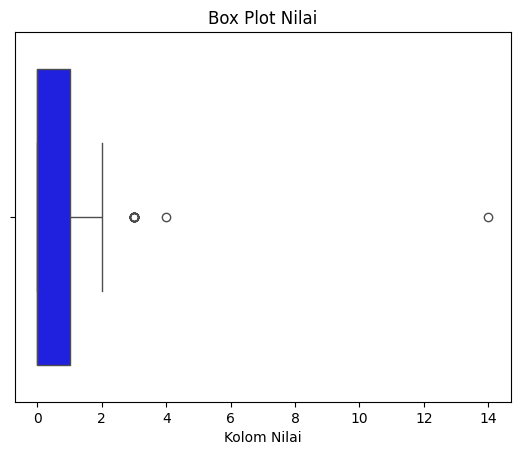

In [14]:
# memvisualisasikan nilai yang ada pada kolom children
sns.boxplot(x=df['children'], color='blue')
plt.xlabel('Kolom Nilai')
plt.title('Box Plot Nilai')
plt.show()

In [15]:
mask = df[df['children'] == 14].index
df = df.drop(mask, axis=0) # axis = 0 is index , axis = 1 is columns
df.describe()

,children,annual_income,birthday_count,employed_days,family_members,label
count,1547.000000,1.524000e+03,1525.000000,1547.000000,1547.000000,1547.000000
mean,0.404008,1.913773e+05,-16039.218361,59404.155785,2.153200,0.113122
std,0.695809,1.132869e+05,4230.662731,137843.873606,0.890038,0.316845
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,-19558.000000,-3176.000000,2.000000,0.000000
50%,0.000000,1.660500e+05,-15653.000000,-1563.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12417.000000,-431.500000,3.000000,0.000000
max,4.000000,1.575000e+06,-7705.000000,365243.000000,6.000000,1.000000


<Axes: >

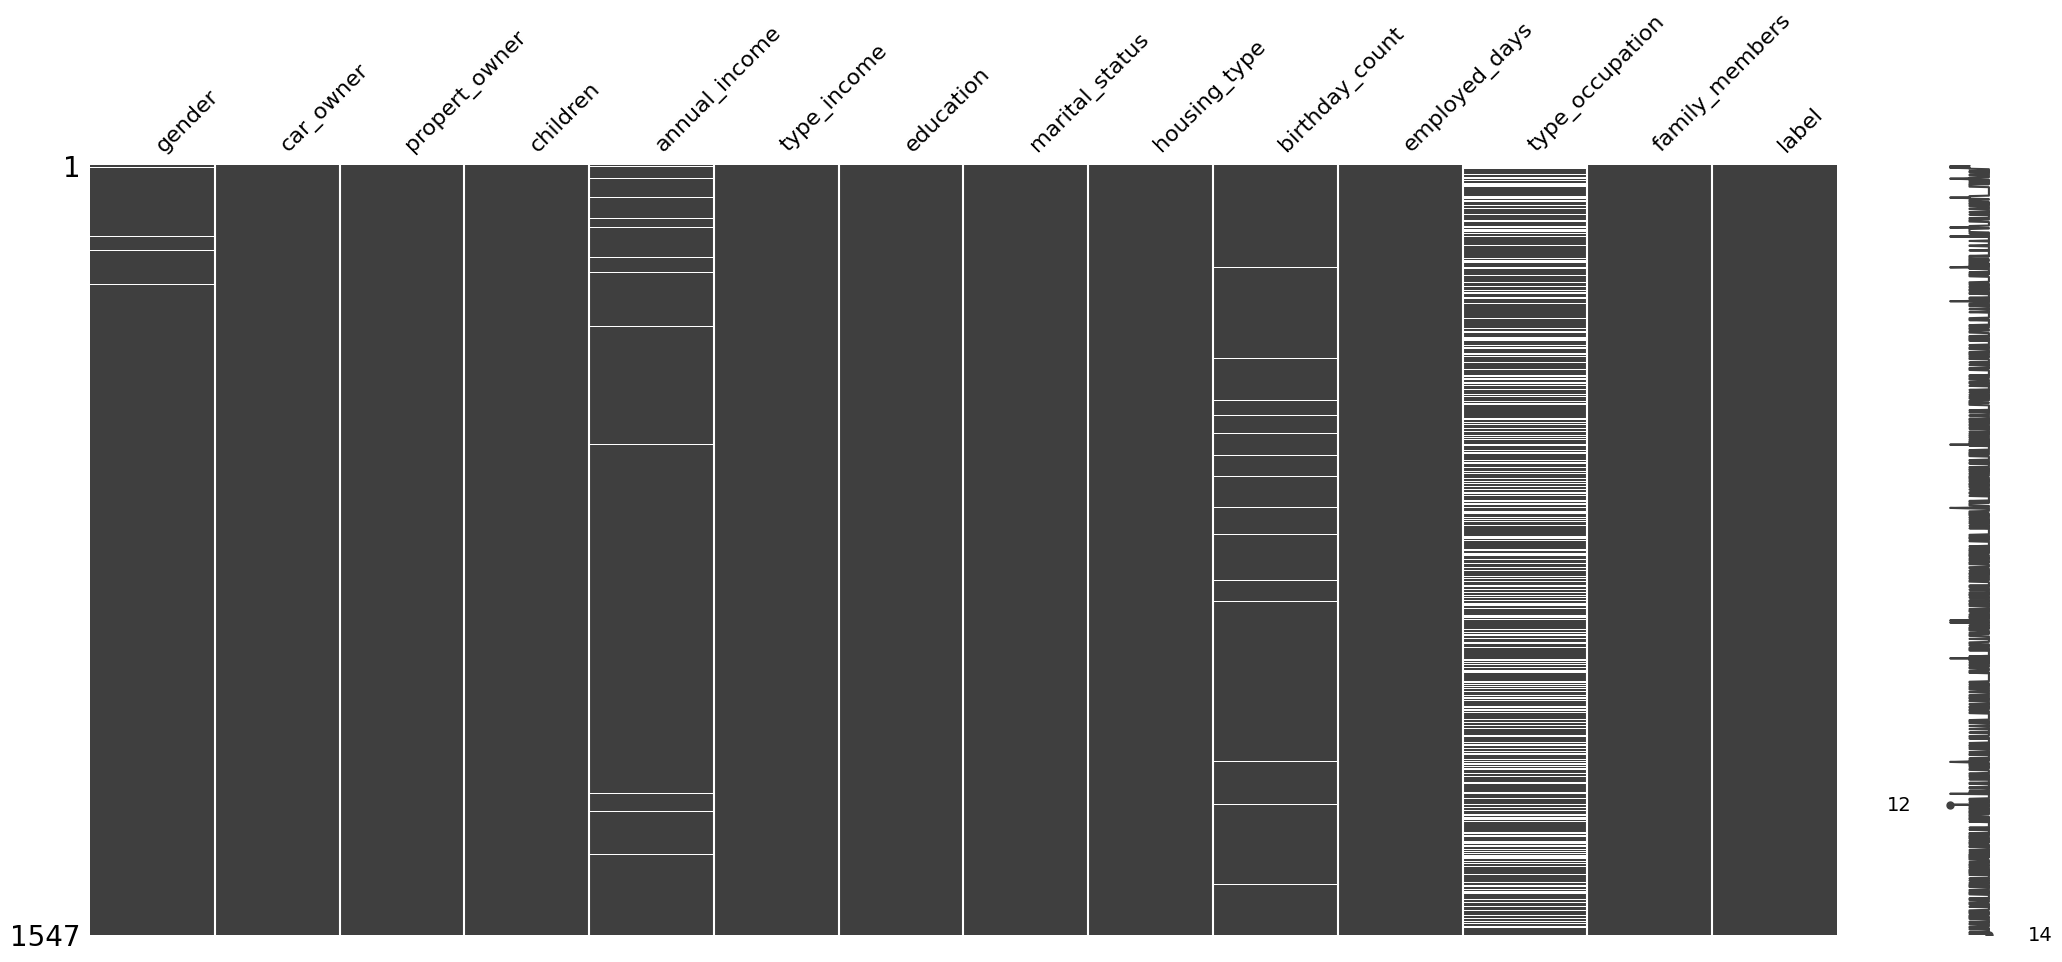

In [16]:
# Melihat apakah ada kolom yang tidak ada nilai di rownya

msno.matrix(df)

## Pre Processing Data

In [17]:
# Melakukan input data pada type_occupation
# kita buat value baru untuk data yang kosong "unknownn" == pekerajaan tidak diketahui
"""Isi missing code disini"""

# Untuk missing yang lain kita drop
df = df.dropna(axis=0)

In [18]:
# (row, column)
# data asli ada (1548,14) setelah di hapus row yang memiliki missing data menjadi (1495, 14) 
df.shape

(1495, 14)

<Axes: >

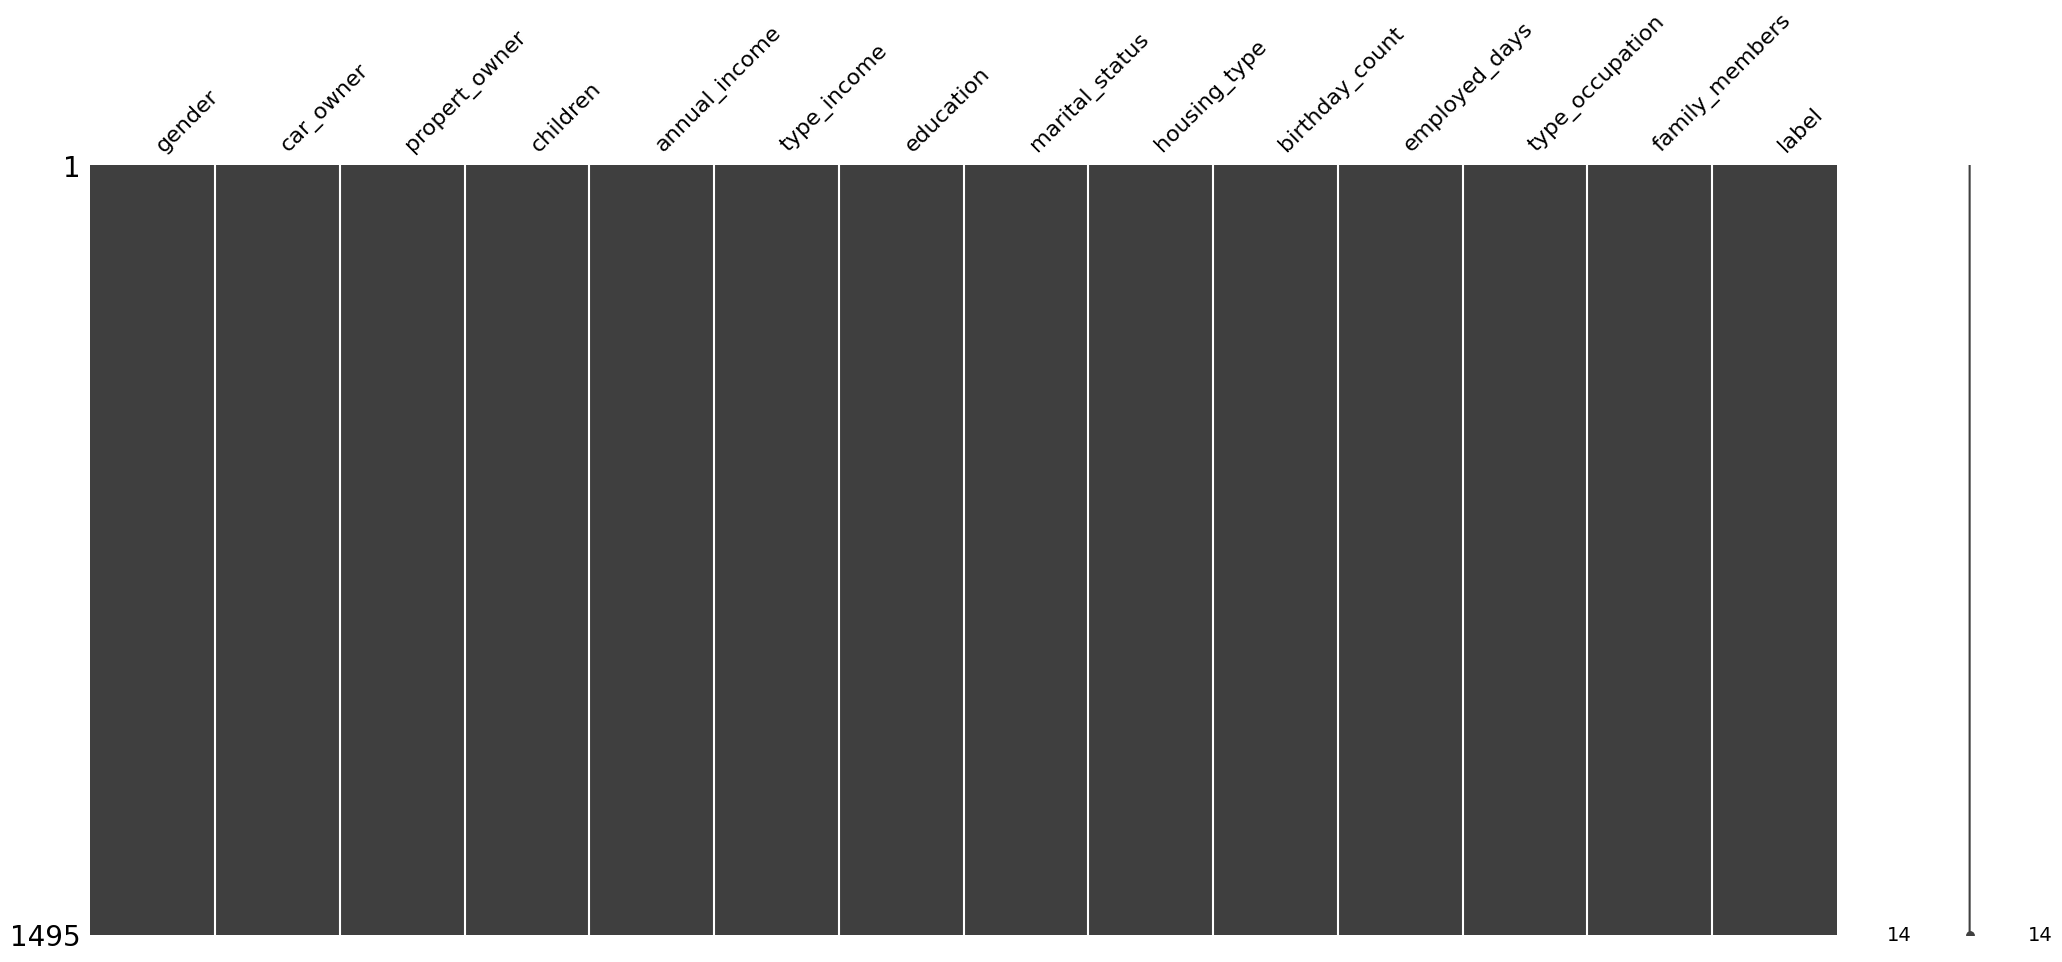

In [19]:
# cek missing value
msno.matrix(df)

In [20]:
# Shuffle dataset 
shuffle_df = df.sample(frac=1, random_state=42)

# Define a size for train set 
train_size = int(0.8 * len(df))

# Split dataset 
df_train = shuffle_df[:train_size]
df_test = shuffle_df[train_size:]

In [21]:
df_train.shape

(1196, 14)

In [22]:
df_test.shape

(299, 14)

## Feature Enginering

In [23]:
def ordinal_encoder(data):
    '''
    encoder categorical columns to numerical columns
    '''

    # initialize ordinal encoder and specify output to be integer (default np.float64)
    enc = OrdinalEncoder(dtype='int64')

    # mask category columns
    cat_col = ['gender', 'car_owner', 'propert_owner', 'type_occupation', 'type_income', 'education',
              'marital_status', 'housing_type']

    # suppress SettingWithCopyWarning of Pandas
    pd.options.mode.chained_assignment = None

    # fit and transform to integer columns
    data[cat_col] = enc.fit_transform(data[cat_col])
    return data

In [24]:
# make ordinal encoder on both train and test
df_train = ordinal_encoder(df_train)
df_test = ordinal_encoder(df_test)

In [26]:
# Melakukan pengolahan untuk data imbalance
df_train['label'].value_counts()

label
0    1063
1     133
Name: count, dtype: int64

- *Interpretasikan Tetang penggunaan ordinal encoder dan standar scaller (Berikan contoh penggunaannya, bukan menjalaskan apa kedua method tersebuut)* <br><br>
"""<br><br>
Tuliskan disini minimal 1 paragraf<br><br>
"""

In [27]:
# separate class
class_1 = df_train[df_train['label'] == 1]
class_0 = df_train[df_train['label'] == 0]

# Upsample class 1
upsampled_class_1 = resample(class_1, # need upsampling on class 1
                              replace=True, # replacement = True
                              n_samples=len(class_0)-len(class_1), # number of row for upsampling
                              stratify=class_1, 
                              random_state=42)

# Combine the class
df_train = pd.concat([class_0, class_1, upsampled_class_1 ])

# Check the class distribution after upsampling
class_distribution = df_train['label'].value_counts()
print("Class distribution after upsampling:\n", class_distribution)

Class distribution after upsampling:
 label
0    1063
1    1063
Name: count, dtype: int64


In [28]:
# separate feature and target
X_train = df_train.drop(columns=['label'])
y_train = df_train['label']
X_test = df_test.drop(columns=['label'])
y_test = df_test['label']

# initialize StandardScaler
scaler = StandardScaler()

# StandardScaler on feature columns
X_train_z = scaler.fit_transform(X_train[X_train.columns])
X_test_z = scaler.fit_transform(X_test[X_test.columns])

## Evaluation model and Testing model

In [29]:
# let see how RF perform on train set (fit train set and predict itself)
# initialize RF
model = RandomForestClassifier()

# Fit the model on the training data
model.fit(X_train_z, y_train)

# Make predictions on the train data
y_pred = model.predict(X_train_z)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print a classification report
report = classification_report(y_train, y_pred)
print("Classification Report:\n", report)

# accuracy is not surprised, very accurate

Accuracy: 0.9967
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1063
           1       0.99      1.00      1.00      1063

    accuracy                           1.00      2126
   macro avg       1.00      1.00      1.00      2126
weighted avg       1.00      1.00      1.00      2126



In [30]:
# now let's see how it perform on test set

# initialize RF
model = RandomForestClassifier()

# Fit the model on the training data
model.fit(X_train_z, y_train)

# Make predictions on the train data
y_pred = model.predict(X_test_z)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# accuracy still high on test set

Accuracy: 0.8997
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       272
           1       0.33      0.11      0.17        27

    accuracy                           0.90       299
   macro avg       0.63      0.54      0.56       299
weighted avg       0.86      0.90      0.88       299



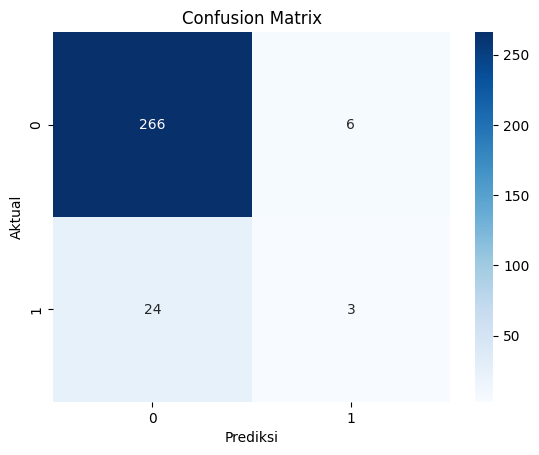

In [31]:
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

### Jelaskan hasil evaluasi model

- Jelaskan evaluasi model disini, harus mencakup penjelasan adanya evaluasi model dan testing model di atas